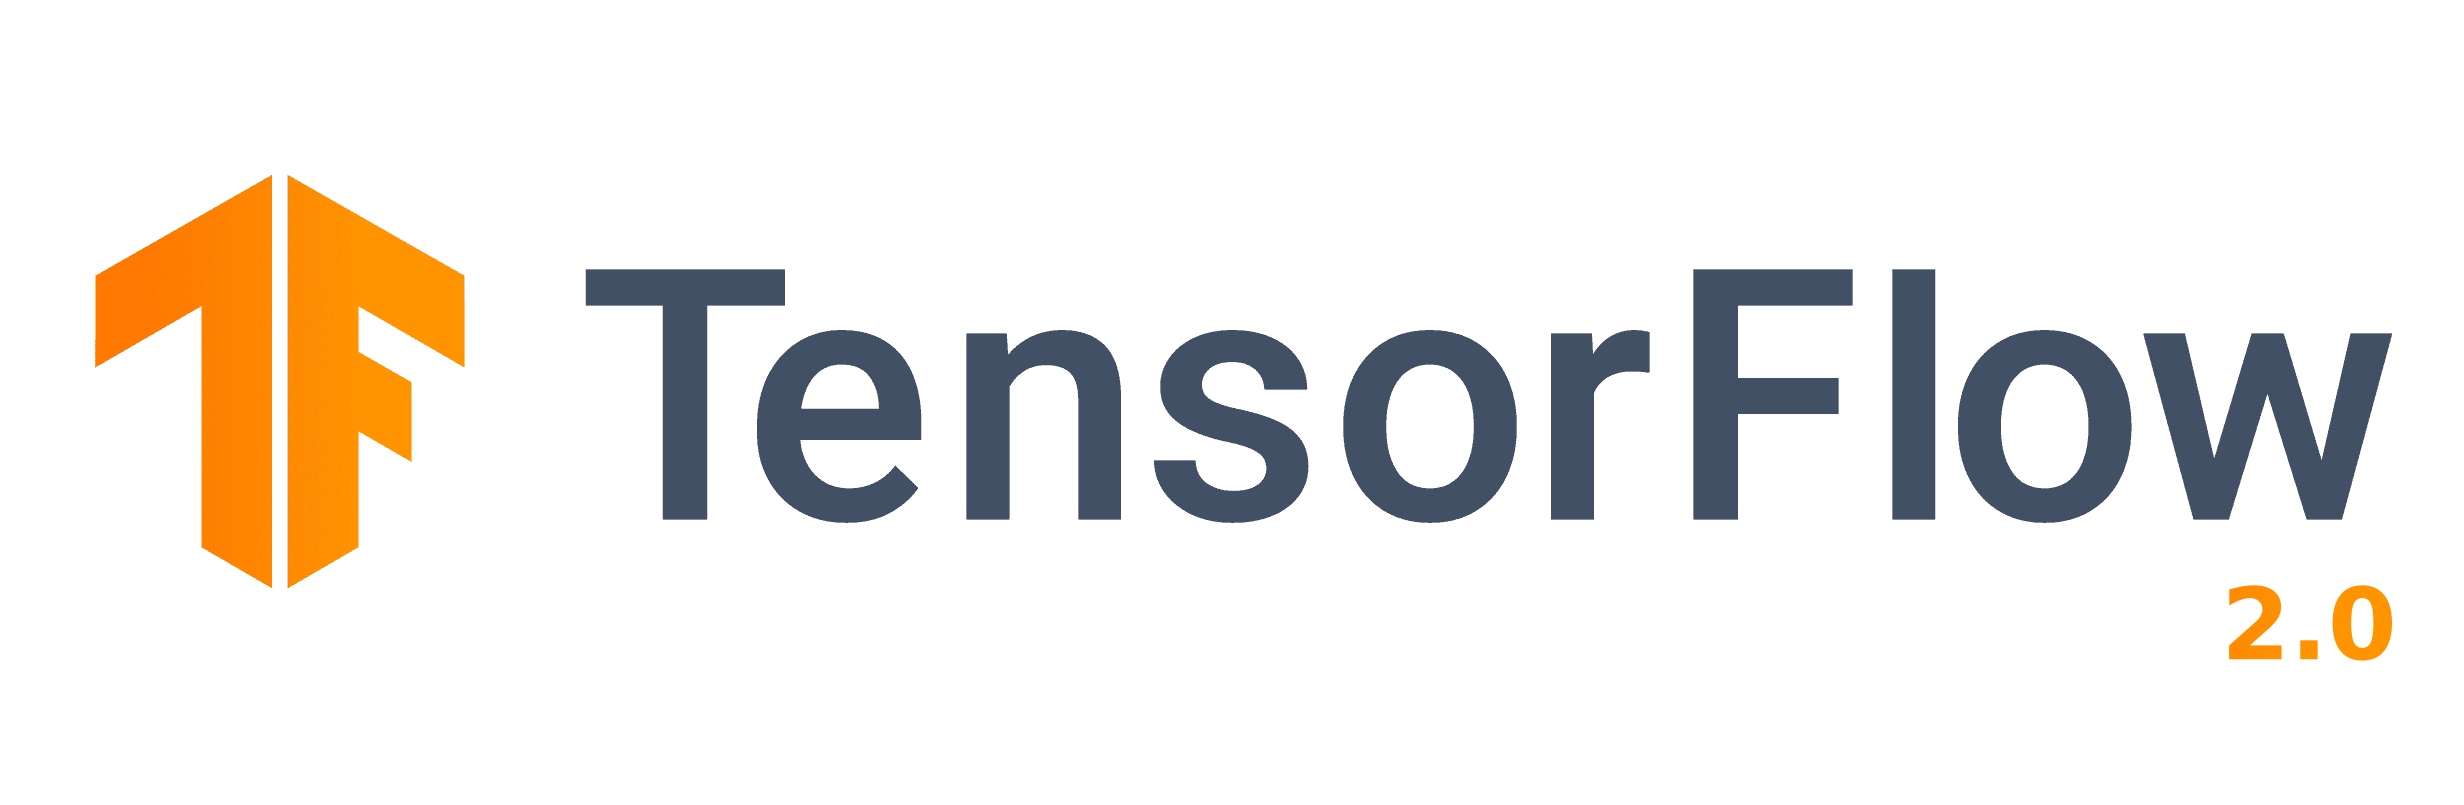

텐서플로우는 다양한 작업에 대해 데이터 흐름 프로그래밍을 위한 오픈소스 소프트웨어 라이브러리이다. 
심볼릭 수학 라이브러리이자, 인공 신경망같은 기계 학습 응용프로그램 및 딥러닝에도 사용된다.

# Tensorflow를 이용한 wine 분류

image.png

In [1]:
from tensorflow.keras import models, layers, utils
import numpy as np
import pandas as pd

## Wine Data 읽기

In [2]:
wine = pd.read_csv('wine.csv')

In [3]:
wine.head()

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

In [4]:
wine.tail()

alcohol  sugar    pH  class
6492     11.2    1.6  3.27    1.0
6493      9.6    8.0  3.15    1.0
6494      9.4    1.2  2.99    1.0
6495     12.8    1.1  3.34    1.0
6496     11.8    0.8  3.26    1.0

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
wine.describe()

alcohol        sugar           pH        class
count  6497.000000  6497.000000  6497.000000  6497.000000
mean     10.491801     5.443235     3.218501     0.753886
std       1.192712     4.757804     0.160787     0.430779
min       8.000000     0.600000     2.720000     0.000000
25%       9.500000     1.800000     3.110000     1.000000
50%      10.300000     3.000000     3.210000     1.000000
75%      11.300000     8.100000     3.320000     1.000000
max      14.900000    65.800000     4.010000     1.000000

In [7]:
np.unique(wine['class'])

array([0., 1.])

## Data, Target 분리 

In [8]:
input = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

## Train, Test 분리

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    input, target, test_size=0.2, random_state=11
)

In [11]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(5197, 3) (1300, 3)
(5197,) (1300,)


## Model 생성

In [12]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(3,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
 dense_4 (Dense)             (None, 2)                 18        
                                                                 
Total params: 11,130
Trainable params: 11,130
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

## 손실함수(loss, cost)

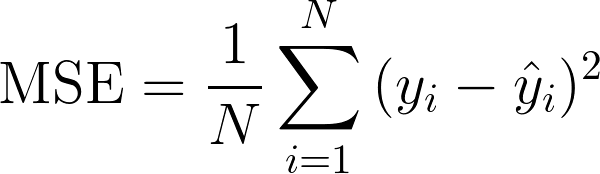

## 손실함수의 종류

### RMSE(Root Mean Squared Error)

 

MSE에 루트(√)를 씌운 것으로 MSE와 기본적으로 동일하다. MSE 값은 오류의 제곱을 구하기 때문에 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 은 값의 왜곡을 줄여준다.

 

### Binary Crossentropy
 

실제 레이블과 예측 레이블 간의 교차 엔트로피 손실을 계산한다. 레이블 클래스(0, 1로 가정)가 2개만 존재할 때 Binary Crossentropy를 사용하면 좋다. 

 

### Categorical Crossentropy


다중 분류 손실함수로 출력값이 one-hot encoding 된 결과로 나오고 실측 결과와의 비교시에도 실측 결과는 

one-hot encoding 형태로 구성된다.

예를 들면 출력 실측값이 아래와 같은 형태(one-hot encoding)로 만들어 줘야 하는 과정을 거쳐야 한다.
[[0 0 1]
 [0 1 0]
 [1 0 0]]  (배치 사이즈 3개인 경우)

네트웍 레이어 구성시 마지막에 Dense(3, activation='softmax') 로 3개의 클래스 각각 별로 positive 확률값이 나오게 된다.


[0.2, 0.3, 0.5]


위 네트웍 출력값과 실측값의 오차값을 계산한다.

 

 

### Sparse_Categorical_Crossentropy

 

'categorical_entropy'처럼 다중 분류 손실함수이지만, 샘플 값은 정수형 자료이다. 예를 들어, 샘플 값이 아래와 같은 형태일 수 있다. (배치 사이즈 3개)


[0, 1, 2] 


네트웍 구성은 동일하게 Dense(3, activation='softmax')로 하고 출력값도 3개가 나오게 된다.

즉, 샘플 값을 입력하는 부분에서 별도 원핫 인코딩을 하지 않고 정수값 그대로 줄 수 있다. 이런 자료를 사용할 때, 컴파일 단계에서 손실 함수만  'sparse_categorical_crossentropy'로 바꿔주면 된다.

 

# 경사하강법

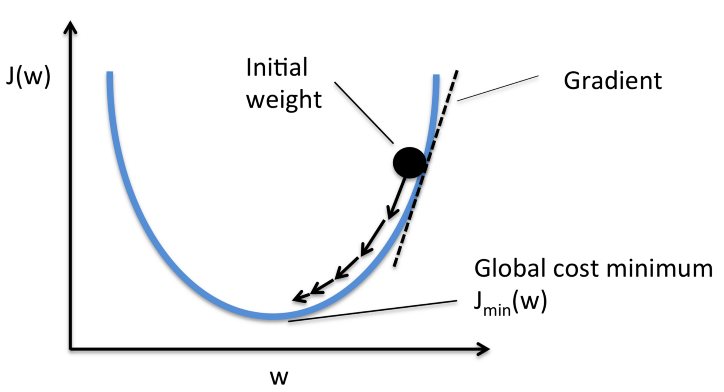

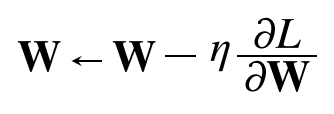

### 각종 Optimizer

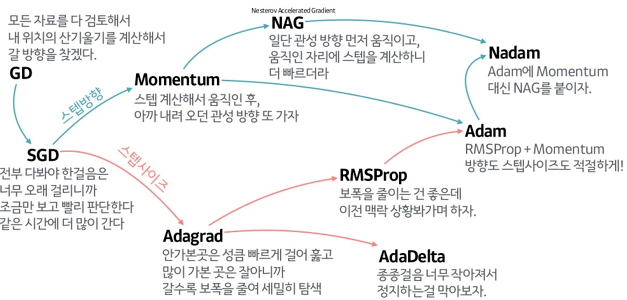

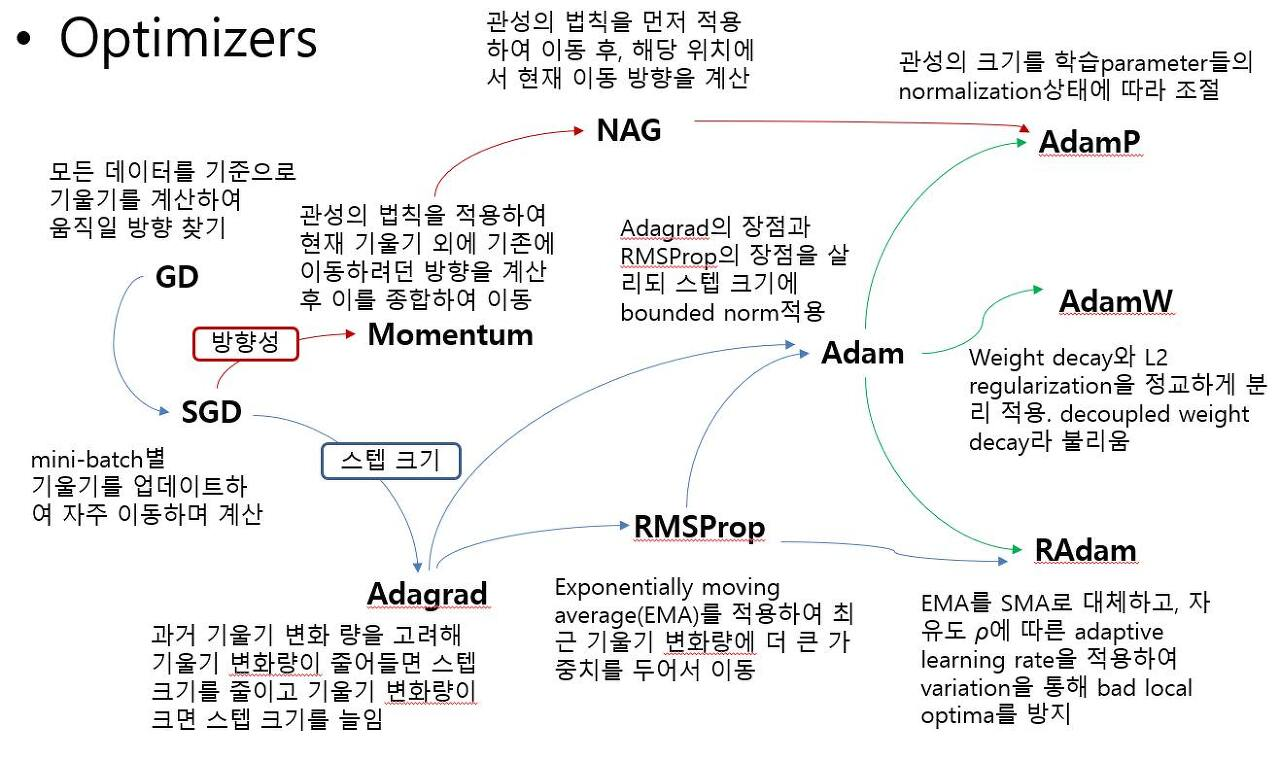

## Model 학습

In [15]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
163/163 [==============================] - 2s 4ms/step - loss: 0.5018 - accuracy: 0.7325
Epoch 2/100
163/163 [==============================] - 1s 4ms/step - loss: 0.4091 - accuracy: 0.7785
Epoch 3/100
163/163 [==============================] - 1s 5ms/step - loss: 0.3552 - accuracy: 0.8428
Epoch 4/100
163/163 [==============================] - 1s 3ms/step - loss: 0.3380 - accuracy: 0.8555
Epoch 5/100
163/163 [==============================] - 1s 5ms/step - loss: 0.3353 - accuracy: 0.8566
Epoch 6/100
163/163 [==============================] - 1s 5ms/step - loss: 0.3308 - accuracy: 0.8605
Epoch 7/100
163/163 [==============================] - 1s 5ms/step - loss: 0.3331 - accuracy: 0.8591
Epoch 8/100
163/163 [==============================] - 1s 5ms/step - loss: 0.3271 - accuracy: 0.8640
Epoch 9/100
163/163 [==============================] - 1s 4ms/step - loss: 0.3285 - accuracy: 0.8576
Epoch 10/100
163/163 [==============================] - 1s 5ms/step - loss: 0.3268 - accura

## Model 평가

In [16]:
model.evaluate(x_test, y_test)

41/41 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8623


[0.3184106945991516, 0.8623076677322388]

In [17]:
model.predict(x_test[:10])

array([[0.1077679 , 0.89223206],
       [0.07244823, 0.9275518 ],
       [0.14695498, 0.85304505],
       [0.53130543, 0.46869454],
       [0.00217102, 0.9978289 ],
       [0.09975034, 0.90024966],
       [0.01295668, 0.9870433 ],
       [0.05093967, 0.9490604 ],
       [0.79628193, 0.20371807],
       [0.66486436, 0.33513564]], dtype=float32)

In [18]:
pred=np.argmax(model.predict(x_test[:20]), axis=1)

In [19]:
print(y_test[:20])

[1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]


In [20]:
wine_type = ['white', 'red']
[ wine_type[p] for p in pred ]

['red',
 'red',
 'red',
 'white',
 'red',
 'red',
 'red',
 'red',
 'white',
 'white',
 'red',
 'white',
 'red',
 'red',
 'red',
 'red',
 'white',
 'red',
 'red',
 'white']